In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
dataframe = pandas.read_csv('../input/andhracsv/Andhra Pradesh .csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [4]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

24 13


In [5]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [6]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [7]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

Epoch 1/200
21/21 - 2s - loss: 0.0066 - accuracy: 0.0476 - val_loss: 0.0531 - val_accuracy: 0.0000e+00
Epoch 2/200
21/21 - 0s - loss: 0.0049 - accuracy: 0.0476 - val_loss: 0.0431 - val_accuracy: 0.0000e+00
Epoch 3/200
21/21 - 0s - loss: 0.0042 - accuracy: 0.0476 - val_loss: 0.0375 - val_accuracy: 0.0000e+00
Epoch 4/200
21/21 - 0s - loss: 0.0039 - accuracy: 0.0476 - val_loss: 0.0351 - val_accuracy: 0.0000e+00
Epoch 5/200
21/21 - 0s - loss: 0.0038 - accuracy: 0.0476 - val_loss: 0.0335 - val_accuracy: 0.0000e+00
Epoch 6/200
21/21 - 0s - loss: 0.0037 - accuracy: 0.0476 - val_loss: 0.0320 - val_accuracy: 0.0000e+00
Epoch 7/200
21/21 - 0s - loss: 0.0036 - accuracy: 0.0476 - val_loss: 0.0307 - val_accuracy: 0.0000e+00
Epoch 8/200
21/21 - 0s - loss: 0.0036 - accuracy: 0.0476 - val_loss: 0.0303 - val_accuracy: 0.0000e+00
Epoch 9/200
21/21 - 0s - loss: 0.0035 - accuracy: 0.0476 - val_loss: 0.0290 - val_accuracy: 0.0000e+00
Epoch 10/200
21/21 - 0s - loss: 0.0035 - accuracy: 0.0476 - val_loss: 0.0

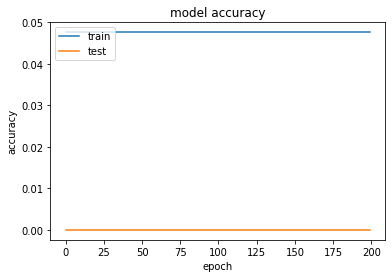

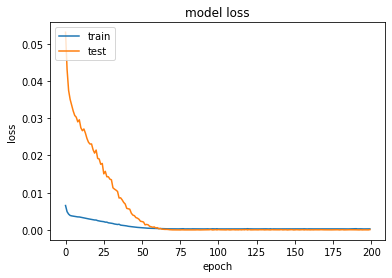

In [8]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer='adam')
#model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(trainX, trainY, validation_split=0.01, epochs=200, batch_size=1, verbose=2)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 575.42 RMSE
Test Score: 8420.15 RMSE


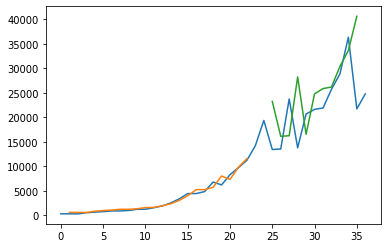

In [10]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()